In [1606]:
%matplotlib notebook

from modsim import *

In [1607]:
m = UNITS.meters
s = UNITS.seconds

In [1608]:
condition = Condition(floorheight = 3 *m,
                     num_floors = 1,
                     v_max = .762 * m / s,
                     a_max = .65 * m / s ** 2)

In [1609]:
def find_magic_num(v_max, a_max):
    t = v_max / a_max
    num_magic = .5 * a_max * t **2 + v_max * t
    return num_magic

In [1610]:
find_magic_num(condition.v_max, condition.a_max)

<Quantity(1.3399476923076923, 'meter')>

In [1611]:
def make_system(condition):
    unpack(condition)
    height = floorheight * num_floors
    init = State(y = 0 * m, vy = 0 * m / s)
    ts = linspace(0,10,10000)
    magic_num = find_magic_num(v_max, a_max)
    print(magic_num)
    return System(init = init,end_time = 0, finished = False, a_max = a_max, v_max = v_max, magic_num = magic_num, height = height, ts = ts)

    

In [1612]:
system = make_system(condition)
system.finished

1.3399476923076923 meter


False

In [1613]:
def slope_func(state, t, system):
    unpack(system)
    y, vy = state
    ay = a_max
    if(system.finished == True):
        return 0,0
    if(vy > v_max):
        ay = 0
        vy = v_max
    if(height < y):
        ay = -a_max
        #print(t)
        return vy, ay
    if(y>= height * .98):
        system.finished = True
        #print(t)
        system.end_time = t
    
    return vy,ay

In [1614]:
run_odeint(system, slope_func)

<IPython.core.display.Javascript object>


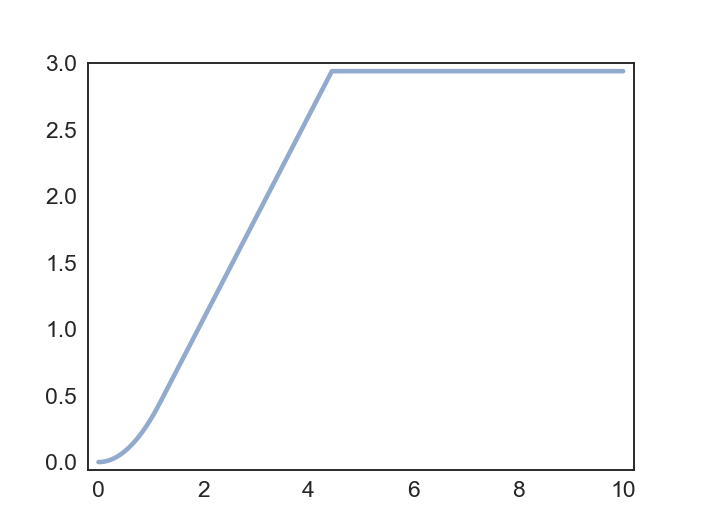

<Quantity(3, 'meter')>

In [1615]:
plot(system.results.y)
system.height

In [1616]:
floors = [0,1,2,3,4,10]

In [1617]:
system.end_time

4.446111530056824

In [1618]:
def multiple_floors(floors):
    total_time = 0
    for i in range(len(floors) - 1):
        condition = Condition(floorheight = 3 *m,
                     num_floors = floors[i+1] - floors[i],
                     v_max = .762 * m / s,
                     a_max = .65 * m / s ** 2)
        system = make_system(condition)
        run_odeint(system,slope_func)
        total_time += system.end_time
    print(total_time)
        

In [1619]:
multiple_floors(floors)

1.3399476923076923 meter
1.3399476923076923 meter
1.3399476923076923 meter
1.3399476923076923 meter
1.3399476923076923 meter
17.784446120227297
